<a href="https://colab.research.google.com/github/wsbrito/I2A2/blob/master/CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# > Installing dependencies

In [ ]:
#executar apenas uma vez
!pip3 install Pillow==4.0.0 image sklearn h5py seaborn opencv-python matplotlib pandas scikit-learn scikit-image scipy 

# > Downloading the dataset

In [ ]:
!git clone https://github.com/viniciusarasantos/aisummit.git
!mkdir ./aisummit/preview


fatal: destination path 'aisummit' already exists and is not an empty directory.
mkdir: cannot create directory ‘./aisummit/preview’: File exists


# > Importing modules

In [ ]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *
from keras.losses import *
from keras.regularizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.callbacks import *

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import cv2
import glob
import h5py
import random
%matplotlib inline

seed = 42

Using TensorFlow backend.


# > Reading the dataset

In [ ]:
with h5py.File('./aisummit/dataset.h5','r') as hf:
    X = hf['X'][:]
    y = hf['y'][:]

In [ ]:
print(np.shape(X))

(150, 256, 256)


# <font color=red> A. Training: </font>

## 1. Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = seed)

In [ ]:
X_train.shape

(96, 256, 256)

In [ ]:
X_val.shape

(24, 256, 256)

In [ ]:
X_test.shape

(30, 256, 256)

## 2. Normalizing and preparing the dataset

In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /=  255
X_val  /=  255
X_test /=  255

X_train = X_train.reshape(-1,256,256,1)
X_val = X_val.reshape(-1,256,256,1)
X_test = X_test.reshape(-1,256,256,1)

In [ ]:
X_train.shape

(96, 256, 256, 1)

## 3. Architecture definition

In [ ]:
input_ = Input((256, 256,1))
x = input_
x = Conv2D(32, kernel_size = (3,3), strides = (1, 1), padding = 'same', activation = 'relu')(x)
#x = SpatialDropout2D(0.1)(x)
#x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, kernel_size = (3,3), strides = (1, 1), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(2, 2)(x)
#x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(16, activation  =  'relu')(x)
#x = Dropout(0.1)(x)
x = Dense(1, activation  =  'sigmoid')(x)

model = Model(input_, x)
model.summary()

#for layer in model.layers:
#  layer.kernel_regularizer = l2(1e-4)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                16777232  
_________________________________________________________________
dens

## 4. Optimizations Hyperparameters

In [ ]:
batch_size = 32
num_epochs = 100
learning_rate = 1e-4

weights_filepath = "weights.h5"
#callbacks = [ModelCheckpoint(weights_filepath, monitor='val_acc', mode='max',
#                             verbose=1, save_best_only=True),
#             EarlyStopping(monitor='val_acc', mode='max', patience=10)]

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = learning_rate), metrics = ['acc'])

## 5. Training:

In [ ]:
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val, y_val),
          callbacks=callbacks)
#model.load_weights(weights_filepath)

Instructions for updating:
Use tf.cast instead.
Train on 96 samples, validate on 24 samples
Epoch 1/30
96/96 [==============================] - 7s 74ms/step - loss: 0.6932 - acc: 0.3646 - val_loss: 0.6932 - val_acc: 0.4167
Epoch 2/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6932 - acc: 0.3646 - val_loss: 0.6932 - val_acc: 0.2917
Epoch 3/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5104 - val_loss: 0.6932 - val_acc: 0.2917
Epoch 4/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5521 - val_loss: 0.6932 - val_acc: 0.2917
Epoch 5/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5521 - val_loss: 0.6932 - val_acc: 0.2917
Epoch 6/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5521 - val_loss: 0.6932 - val_acc: 0.2500
Epoch 7/30
96/96 [==============================] - 0s 4ms/step - loss: 0.6931 - acc: 0.5417 - val_loss: 0.6932 - val_acc: 0.25

## 6. Plotting the curves

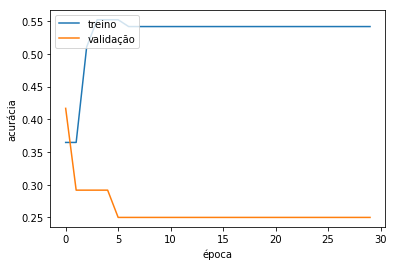

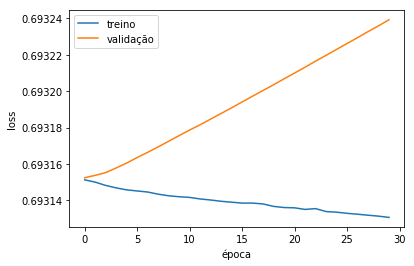

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

## 7. Verifying the accuracy on the test set

In [ ]:
model.evaluate(X_test, y_test)[1]

30/30 [==============================] - 0s 16ms/step


[0.6931448578834534, 0.5]

# <font color=red>B. Transfer Learning <font>

## 1. Reshaping the images (the pretrained models use RGB)

In [ ]:
X_train.shape

(96, 256, 256, 1)

In [ ]:
X_train = np.stack((X_train.reshape(-1, 256, 256),)*3, axis=-1)
X_val = np.stack((X_val.reshape(-1, 256, 256),)*3, axis=-1)
X_test = np.stack((X_test.reshape(-1, 256, 256),)*3, axis=-1)

In [ ]:
X_train.shape

(96, 256, 256, 3)

## 2. Architecture Definition

In [ ]:
pretrained_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

In [ ]:
number_of_frozen_layers = 0
for i, layer in enumerate(pretrained_model.layers):
  if i>=number_of_frozen_layers:
    break
  layer.trainable = False

In [ ]:
#x = GlobalAveragePooling2D()(pretrained_model.output)
x = Flatten()(pretrained_model.output)
x = Dense(16, activation  =  'relu')(x)
x = Dense(1, activation  =  'sigmoid')(x)

model = Model(pretrained_model.input, x)
model.summary()

#for layer in model.layers:
#  layer.kernel_regularizer = l2(1e-4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

## 3. Optimzation Hyperparameters

In [ ]:
batch_size = 32
num_epochs = 100
learning_rate = 1e-4

weights_filepath = "weights.h5"
callbacks = [ModelCheckpoint(weights_filepath, monitor='val_acc', mode='max',
                             verbose=1, save_best_only=True),
             EarlyStopping(monitor='val_acc', mode='max', patience=10)]

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = learning_rate), metrics = ['acc'])

## 4. Training:

In [ ]:
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val, y_val),
          callbacks=callbacks)
model.load_weights(weights_filepath)

Train on 96 samples, validate on 24 samples
Epoch 1/30
96/96 [==============================] - 11s 114ms/step - loss: 0.7298 - acc: 0.5104 - val_loss: 0.7680 - val_acc: 0.3333
Epoch 2/30
96/96 [==============================] - 2s 18ms/step - loss: 0.7154 - acc: 0.5104 - val_loss: 0.7250 - val_acc: 0.3750
Epoch 3/30
96/96 [==============================] - 2s 18ms/step - loss: 0.7154 - acc: 0.4896 - val_loss: 0.7161 - val_acc: 0.4167
Epoch 4/30
96/96 [==============================] - 2s 18ms/step - loss: 0.7102 - acc: 0.4688 - val_loss: 0.7181 - val_acc: 0.4167
Epoch 5/30
96/96 [==============================] - 2s 18ms/step - loss: 0.6958 - acc: 0.5625 - val_loss: 0.7160 - val_acc: 0.4167
Epoch 6/30
96/96 [==============================] - 2s 18ms/step - loss: 0.6935 - acc: 0.5312 - val_loss: 0.7127 - val_acc: 0.4167
Epoch 7/30
96/96 [==============================] - 2s 18ms/step - loss: 0.6877 - acc: 0.5312 - val_loss: 0.7115 - val_acc: 0.4167
Epoch 8/30
96/96 [===================

## 5. Plotting the curves

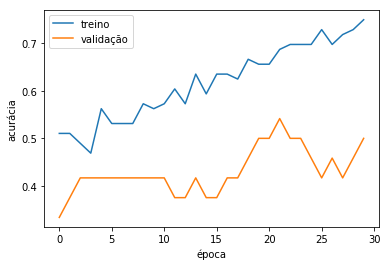

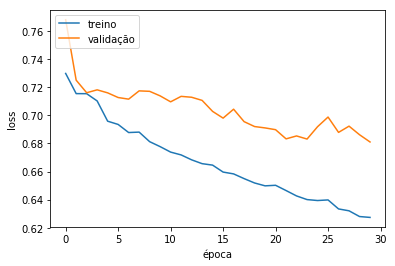

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

## 6. Verifying the accuracy on the test set

In [ ]:
model.evaluate(X_test, y_test)[1]

30/30 [==============================] - 2s 83ms/step


[0.6385996341705322, 0.699999988079071]

# <font color=red>C. Data augmentation</font> 

## 1. Augmentation parameters

In [ ]:
rotation_range = 20
width_shift_range = 0.1
height_shift_range = 0.1
horizontal_flip = True
shear_range = 0.1
zoom_range = 0.1

datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        fill_mode='nearest')



## 2. Demonstration:

Imagem Original


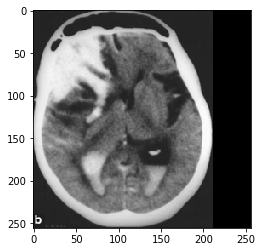

Imagens Geradas com Data Augmentation


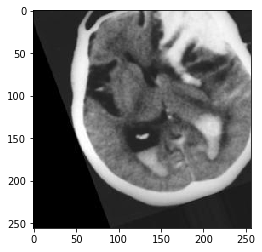

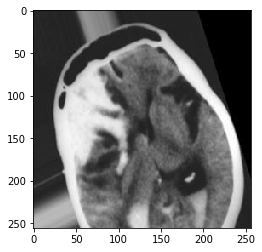

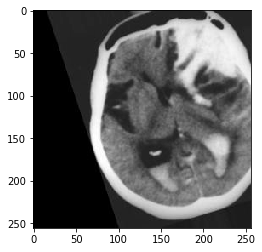

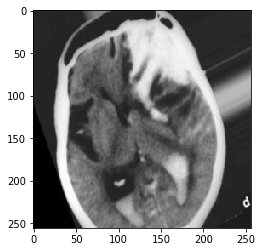

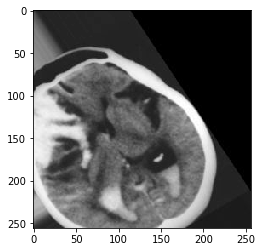

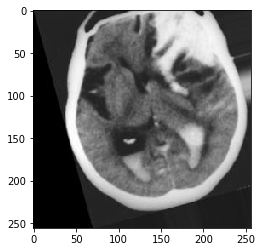

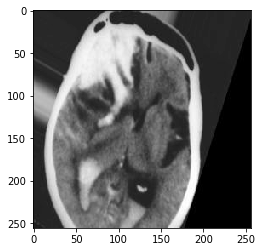

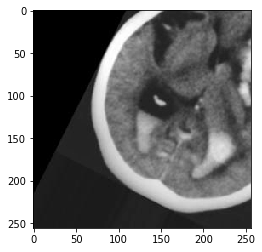

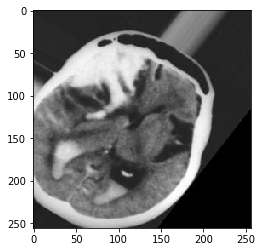

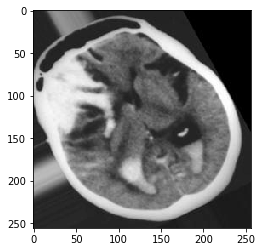

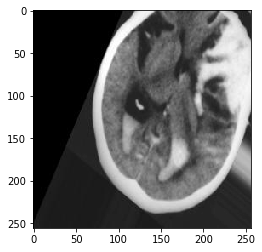

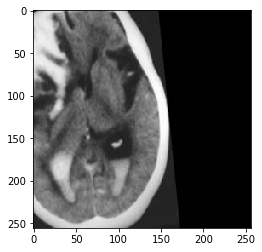

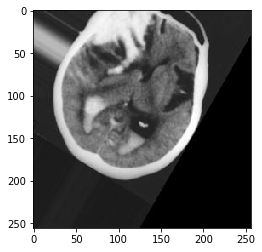

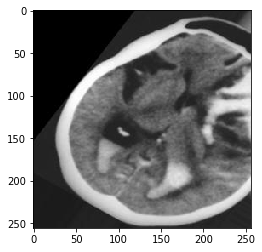

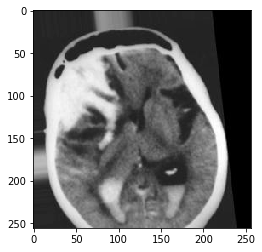

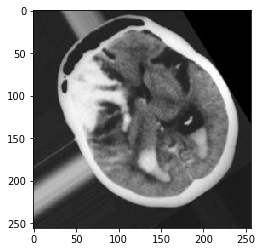

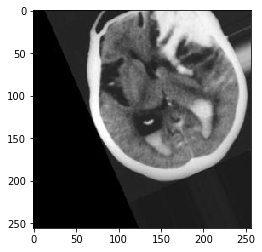

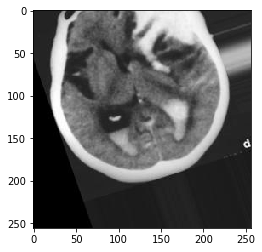

In [ ]:
i = 0
img = X[0].reshape(1, 256, 256, 1)

for batch in datagen.flow(img, batch_size=1,
                          save_to_dir='./aisummit/preview', save_prefix='chest', save_format='jpeg'):
    i += 1
    if i > 2:
        break  # otherwise the generator would loop indefinitely
        
print("Imagem Original")
plt.imshow(img.reshape(256, 256), cmap='gray'),plt.show()
print("Imagens Geradas com Data Augmentation")

for file in glob.glob("./aisummit/preview/*.jpeg"):
    img = mpimg.imread(file)
    plt.imshow(img.reshape(256, 256), cmap='gray'),plt.show()

## 3. Architecture Definition

In [ ]:
pretrained_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

number_of_frozen_layers = 0
for i, layer in enumerate(pretrained_model.layers):
  if i>=number_of_frozen_layers:
    break
  layer.trainable = False
  
#x = GlobalAveragePooling2D()(pretrained_model.output)
x = Flatten()(pretrained_model.output)
x = Dense(16, activation  =  'relu')(x)
x = Dense(1, activation  =  'sigmoid')(x)

model = Model(pretrained_model.input, x)
model.summary()

#for layer in model.layers:
#  layer.kernel_regularizer = l2(1e-4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

## 4. Optimization Hyperparameters

In [ ]:
batch_size = 32
num_epochs = 100
learning_rate = 1e-4

weights_filepath = "weights.h5"
callbacks = [ModelCheckpoint(weights_filepath, monitor='val_acc', mode='max',
                             verbose=1, save_best_only=True),
             EarlyStopping(monitor='val_acc', mode='max', patience=10)]

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = learning_rate), metrics = ['acc'])

## 5. Training

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, seed=seed)

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs = num_epochs,
                              verbose = 1,
                              validation_data = (X_val, y_val),
                              callbacks=callbacks)
model.load_weights(weights_filepath)

Epoch 1/30
3/3 [==============================] - 4s 1s/step - loss: 0.7025 - acc: 0.5104 - val_loss: 0.6708 - val_acc: 0.6667
Epoch 2/30
3/3 [==============================] - 2s 565ms/step - loss: 0.7082 - acc: 0.4896 - val_loss: 0.6582 - val_acc: 0.7500
Epoch 3/30
3/3 [==============================] - 2s 567ms/step - loss: 0.7076 - acc: 0.4792 - val_loss: 0.6511 - val_acc: 0.7917
Epoch 5/30
3/3 [==============================] - 2s 570ms/step - loss: 0.7007 - acc: 0.5625 - val_loss: 0.6547 - val_acc: 0.7917
Epoch 6/30
3/3 [==============================] - 2s 574ms/step - loss: 0.7018 - acc: 0.4167 - val_loss: 0.6394 - val_acc: 0.7500
Epoch 7/30
3/3 [==============================] - 2s 569ms/step - loss: 0.6882 - acc: 0.5000 - val_loss: 0.6452 - val_acc: 0.7500
Epoch 8/30
3/3 [==============================] - 2s 572ms/step - loss: 0.6698 - acc: 0.5729 - val_loss: 0.6428 - val_acc: 0.7500
Epoch 9/30
3/3 [==============================] - 2s 575ms/step - loss: 0.7020 - acc: 0.5312 

## 6. Plotting the curves

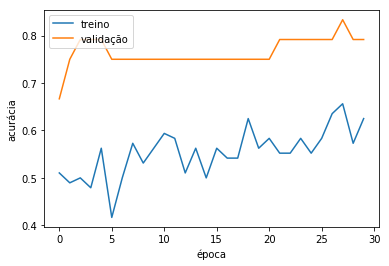

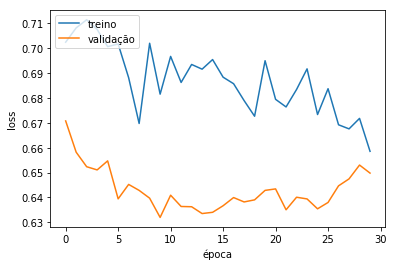

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc = 'upper left')
plt.show()

## 7. Verifying the accuracy on test set

In [ ]:
model.evaluate(X_test, y_test)[1]

30/30 [==============================] - 0s 7ms/step


[0.6678596138954163, 0.6666666865348816]